### setting up

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from sys import path as syspath
syspath.append("../")

%load_ext autoreload
%autoreload 1

import os
from collections import OrderedDict
# from sklearn.linear_model import LogisticRegression, LinearRegression
import pickle
from util.data_functions import *
from util.model_functions import *

from copy import deepcopy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'functions.fastFunctions'

: 

In [2]:
def showdf(a_):
    from IPython.display import display
    display(a_.applymap("{0:0.1f}".format))

In [3]:
DataDict = {
    "Pr": pd.read_csv("Pr_Pl_sequences/Pr_constitutive.csv", usecols=[0,1]),
    "Pl": pd.read_csv("Pr_Pl_sequences/Pl_constitutive.csv", usecols=[0,1]),
    "36N": pd.read_csv("36N_seqences/36N_constitutive.csv", usecols=[0,1])
}

In [4]:
# first perform the same splits as previously
DataDict = {lib:splitDataset(DataDict[lib]) for lib in DataDict}
# then merge Pr and Pl
DataDict["Pr.Pl"] = pd.concat([DataDict["Pr"],DataDict["Pl"]], ignore_index=True)
# del DataDict["Pl"], DataDict["Pr"]

In [5]:
# RBSPos = {lib:getRBSpositions(DataDict[lib]) for lib in DataDict}

In [5]:
numData = createNumData(DataDict,tts=["training","validation","evaluation","all"])

for lib in numData:
    print (lib)
    for split in numData[lib]:
        print ("%7s"%split, list(numData[lib][split].keys()), numData[lib][split]["seqs"].shape)

training
     Pr ['seqs', 'lums', 'digiLums', 'weights'] (7485, 115)
     Pl ['seqs', 'lums', 'digiLums', 'weights'] (1790, 115)
    36N ['seqs', 'lums', 'digiLums', 'weights'] (7921, 115)
  Pr.Pl ['seqs', 'lums', 'digiLums', 'weights'] (9275, 115)
validation
     Pr ['seqs', 'lums', 'digiLums', 'weights'] (2495, 115)
     Pl ['seqs', 'lums', 'digiLums', 'weights'] (597, 115)
    36N ['seqs', 'lums', 'digiLums', 'weights'] (2641, 115)
  Pr.Pl ['seqs', 'lums', 'digiLums', 'weights'] (3092, 115)
evaluation
     Pr ['seqs', 'lums', 'digiLums', 'weights'] (2496, 115)
     Pl ['seqs', 'lums', 'digiLums', 'weights'] (597, 115)
    36N ['seqs', 'lums', 'digiLums', 'weights'] (2641, 115)
  Pr.Pl ['seqs', 'lums', 'digiLums', 'weights'] (3093, 115)
all
     Pr ['seqs', 'lums', 'digiLums', 'weights'] (12476, 115)
     Pl ['seqs', 'lums', 'digiLums', 'weights'] (2984, 115)
    36N ['seqs', 'lums', 'digiLums', 'weights'] (13203, 115)
  Pr.Pl ['seqs', 'lums', 'digiLums', 'weights'] (15460, 115)


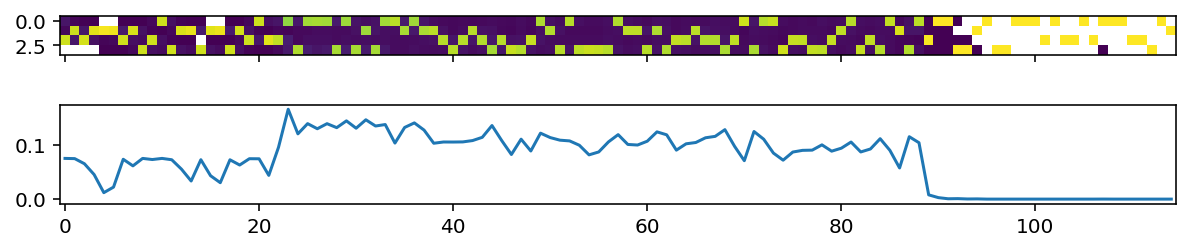

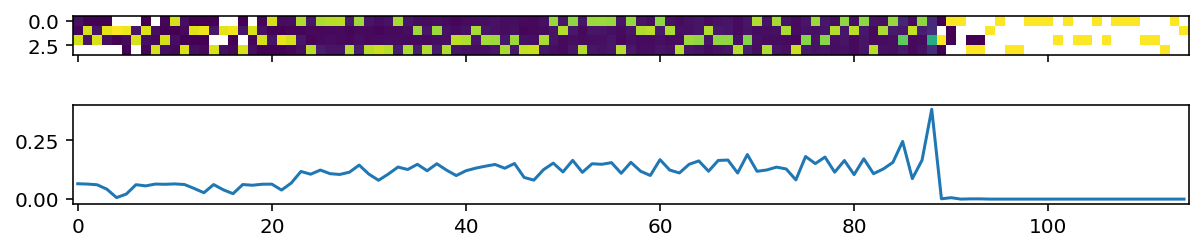

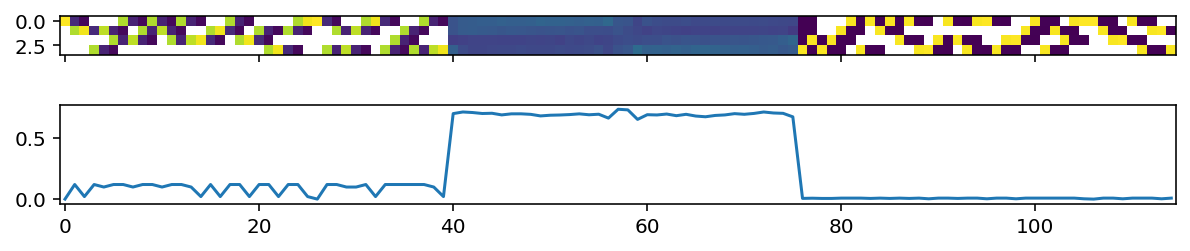

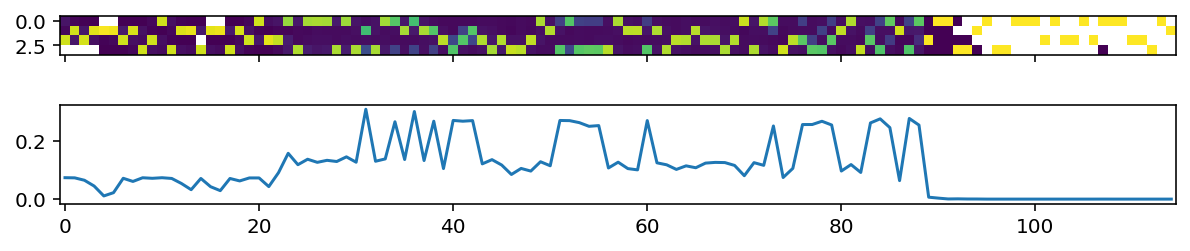

In [6]:
for dataID in DataDict:
    seqs = numData["all"][dataID]["seqs"]
    df = pd.DataFrame([pd.Series(seqs.T[i]).value_counts() for i in range(seqs.shape[1])]).T
    fig, axs = plt.subplots(2,1,figsize=(10,2), sharex=True)
    axs[0].imshow(df)
    axs[1].plot(1-df.max(axis=0)/df.max().max())
#     break

### Import models

In [8]:
models = OrderedDict()
for fitID in ["Pr","Pr.Pl.36N"]:
    folder = f"models/fitted_on_{fitID}/"
    for modelFile in sorted(os.listdir(folder)):
        if "model" not in modelFile: continue
        with open(folder+modelFile, "rb") as f:
            modelName = modelFile.split(".")[0].lstrip("model_")+f"[{fitID}]"
            models[modelName] = pickle.load(f)
            models[modelName]["folder"] = folder

In [9]:
pd.DataFrame(models).T

DataIDs spFlex bindMode includeRC  \
[0]_stm[Pr]                           [Pr.Pl, 36N]      0      max         0   
[1]_stm+flex[Pr]                      [Pr.Pl, 36N]      2      max         0   
[2]_stm+flex+cumul[Pr]                [Pr.Pl, 36N]      2      add         0   
[3]_stm+flex+cumul+rbs[Pr]            [Pr.Pl, 36N]      2      add         0   
[4]_stm+flex+cumul+rbs+rc[Pr]         [Pr.Pl, 36N]      2      add         1   
[0]_stm[Pr.Pl.36N]                    [Pr.Pl, 36N]      0      max         0   
[1]_stm+flex[Pr.Pl.36N]               [Pr.Pl, 36N]      2      max         0   
[2]_stm+flex+cumul[Pr.Pl.36N]         [Pr.Pl, 36N]      2      add         0   
[3]_stm+flex+cumul+rbs[Pr.Pl.36N]     [Pr.Pl, 36N]      2      add         0   
[4]_stm+flex+cumul+rbs+rc[Pr.Pl.36N]  [Pr.Pl, 36N]      2      add         1   
[5]_extended[Pr.Pl.36N]               [Pr.Pl, 36N]      2      add         1   

                                           Layout                    ThDict  \
[0]_stm[Pr]                           [12, 8, 12]  {'Pr.Pl': 77, '36N': -1}   
[1]_stm+flex[Pr]                      [12, 8, 12]  {'Pr.Pl': 75, '36N': -1}   
[2]_stm+flex+cumul[Pr]                [12, 8, 12]  {'Pr.Pl': 75, '36N': -1}   
[3]_stm+flex+cumul+rbs[Pr]            [12, 8, 12]  {'Pr.Pl': 55, '36N': -1}   
[4]_stm+flex+cumul+rbs+rc[Pr]         [12, 8, 12]  {'Pr.Pl': 55, '36N': -1}   
[0]_stm[Pr.Pl.36N]                    [12, 8, 12]    {'Pr.Pl': 0, '36N': 0}   
[1]_stm+flex[Pr.Pl.36N]               [12, 8, 12]    {'Pr.Pl': 0, '36N': 0}   
[2]_stm+flex+cumul[Pr.Pl.36N]         [12, 8, 12]    {'Pr.Pl': 0, '36N': 0}   
[3]_stm+flex+cumul+rbs[Pr.Pl.36N]     [12, 8, 12]   {'Pr.Pl': 55, '36N': 0}   
[4]_stm+flex+cumul+rbs+rc[Pr.Pl.36N]  [12, 8, 12]   {'Pr.Pl': 55, '36N': 0}   
[5]_extended[Pr.Pl.36N]               [12, 8, 12]   {'Pr.Pl': 55, '36N': 0}   

                                                                               chem.pot  \
[0]_stm[Pr]                           {'Pr.Pl': -18.84561179825073, '36N': -22.32183...   
[1]_stm+flex[Pr]                      {'Pr.Pl': -17.610896702945773, '36N': -19.590712}   
[2]_stm+flex+cumul[Pr]                 {'Pr.Pl': -17.56085014317901, '36N': -19.470752}   
[3]_stm+flex+cumul+rbs[Pr]            {'Pr.Pl': -18.28291645481049, '36N': -19.5282704}   
[4]_stm+flex+cumul+rbs+rc[Pr]         {'Pr.Pl': -18.144299720116617, '36N': -19.8591...   
[0]_stm[Pr.Pl.36N]                    {'Pr.Pl': -17.925556286562, '36N': -18.5105192...   
[1]_stm+flex[Pr.Pl.36N]               {'Pr.Pl': -18.03750400147544, '36N': -18.51051...   
[2]_stm+flex+cumul[Pr.Pl.36N]         {'Pr.Pl': -17.908525893586578, '36N': -18.5105...   
[3]_stm+flex+cumul+rbs[Pr.Pl.36N]     {'Pr.Pl': -18.976465401312268, '36N': -18.5105...   
[4]_stm+flex+cumul+rbs+rc[Pr.Pl.36N]  {'Pr.Pl': -17.666871259475222, '36N': -18.5105...   
[5]_extended[Pr.Pl.36N]               {'Pr.Pl': -17.978935789786206, '36N': -18.5756...   

                                                                           sp.penalties  \
[0]_stm[Pr]                                                                         [0]   
[1]_stm+flex[Pr]                      [1.8049884895346935, 1.76418583090379, 0.0, 1....   
[2]_stm+flex+cumul[Pr]                [1.7452471475218656, 1.9335519941690962, 0.0, ...   
[3]_stm+flex+cumul+rbs[Pr]            [1.860088117470787, 1.9345812769679307, 0.0, 1...   
[4]_stm+flex+cumul+rbs+rc[Pr]         [1.7954461618629036, 1.945897725947522, 0.0, 1...   
[0]_stm[Pr.Pl.36N]                                                                  [0]   
[1]_stm+flex[Pr.Pl.36N]               [9.214861139368063, 2.2524841750108124, 0.0, 1...   
[2]_stm+flex+cumul[Pr.Pl.36N]         [8.179763367905347, 2.2477285735281765, 0.0, 1...   
[3]_stm+flex+cumul+rbs[Pr.Pl.36N]     [8.580783027261091, 2.2402695963516, 0.0, 1.29...   
[4]_stm+flex+cumul+rbs+rc[Pr.Pl.36N]  [8.513618275205907, 2.1215349854227403, 0.0, 1...   
[5]_extended[Pr.Pl.36N]               [

### Calculate

In [10]:
def refitChemPot(model, objF):
    model = deepcopy(model)
    objChemPot = {}
    for parId in ["Pr.Pl","36N"]:
        mu0 = model["chem.pot"][parId]
        if parId=="36N":
            dataID = "36N"
        elif "Pr.Pl" in model["DataIDs"]:
            dataID = "Pr.Pl"
        else: 
            dataID = "Pr"
        mu0 = model["chem.pot"][parId]
        def toMin(x):
            try: x = x[0]
            except: pass
            model["chem.pot"][parId] = x
            r = lps2eval(model, objF, numData=numData, fit=False, tt="training", DataIDs_=[dataID])
            out = r[dataID] if objF=="mlogL" else -r[dataID]
            return out
        mus = np.arange(-40,-10,.5)
        ys = np.array([toMin(mu) for mu in mus])
        objChemPot[parId] = mus[np.argmin(ys)]
    return objChemPot

In [11]:
for objF in ["mlogL", "linR2"]:
    for refit in [False, True]:
        if objF=="mlogL" and refit: continue
        Results = OrderedDict()
        for modelName in models:
            model = deepcopy(models[modelName])
            Results[modelName] = OrderedDict()
            if refit:
                model["chem.pot_%s"%objF] = refitChemPot(model, objF)
            for tt in numData:
                res = lps2eval(model, objF, numData=numData, fit=False, DataIDs_=DataDict.keys(), tt=tt)
                for dataID in DataDict: 
                    Results[modelName][dataID+"_"+tt] = res[dataID]

        Results = pd.DataFrame(Results)
        saveName = f"comparison_{objF}"
        if refit:
            saveName += "_refitted_mu"
        Results.to_csv(f"models/{saveName}.csv")

#### add pairwise interactions

If the cells are evaluated in order, the current `model` contains the `chem.pot_linR2`, so we calculate the R2 with the pairwise interactions now

In [61]:
newModelName = "[6]_extended+pwi[Pr.Pl.36N]"

In [47]:
dinuDF = pd.read_csv("pairwise_interactions.csv", index_col=0)
dinuDF["interaction"] = list(map(eval, dinuDF["interaction"]))

In [50]:
# refitted linR2
dinuRes = OrderedDict()
for tt in numData:
    res = lps2eval(
        model, objF, numData=numData, fit=False, DataIDs_=DataDict.keys(), tt=tt,
        dinucl=True,
        dinuCoordsAndValues=(dinuDF.interaction.values, dinuDF.value.values)
                  )
    for dataID in DataDict: 
        dinuRes[dataID+"_"+tt] = res[dataID]

Results[newModelName] = pd.Series(dinuRes)

Results.to_csv(f"models/{saveName}.csv")

In [63]:
# native mlogL and linR2
refit=False
model = deepcopy(models["[5]_extended[Pr.Pl.36N]"])
for objF in ["linR2","mlogL"]:
    dinuRes = OrderedDict()
    for tt in numData:
        res = lps2eval(
            model, objF, numData=numData, fit=False, DataIDs_=DataDict.keys(), tt=tt,
            dinucl=True,
            dinuCoordsAndValues=(dinuDF.interaction.values, dinuDF.value.values)
                      )
        for dataID in DataDict: 
            dinuRes[dataID+"_"+tt] = res[dataID]

    savePath = f"models/comparison_{objF}.csv"
    Results = pd.read_csv(savePath, index_col=0)
    Results[newModelName] = pd.Series(dinuRes)
    Results.to_csv(savePath)

### See

#### $-\log \mathcal{L}$

In [64]:
Results = pd.read_csv("models/comparison_mlogL.csv", index_col=0)

In [65]:
for fitID in ["Pr","Pr.Pl.36N"]:
    print ("\n","="*40,"fitted on", fitID)
    for dataID in ["Pr",'Pl',"36N"]:
        df = Results.loc[
            [i for i in Results.index if i.split("_")[0]==dataID],
            [c for c in Results.columns if f"[{fitID}]" in c]
                   ].copy()
        df = df.rename({c:c.split("_")[0] for c in df.columns}, axis="columns")
        showdf(df.diff(axis=1))


 ======================================== fitted on Pr


[0]     [1]    [2]    [3]    [4]
Pr_training    nan  -595.6  -29.4  -23.3  -11.3
Pr_validation  nan  -192.2  -13.6  -12.1    0.4
Pr_evaluation  nan  -181.4  -15.3   -3.9   -2.4
Pr_all         nan  -967.9  -58.7  -39.8  -13.2

[0]    [1]   [2]    [3]   [4]
Pl_training    nan   51.4  -0.2  -77.0  37.6
Pl_validation  nan  -29.9  -2.7   -4.3   0.6
Pl_evaluation  nan  -31.5  -2.5   -5.1   2.0
Pl_all         nan  -10.6  -5.7  -86.4  40.1

[0]      [1]     [2]    [3]    [4]
36N_training    nan  -1013.8  -125.7   -8.0  -28.5
36N_validation  nan   -353.3   -33.7   -8.9   -5.3
36N_evaluation  nan   -357.8   -31.2   -7.4   -0.6
36N_all         nan  -1781.1  -188.3  -24.2  -34.4


 ======================================== fitted on Pr.Pl.36N


[0]      [1]    [2]    [3]    [4]   [5]     [6]
Pr_training    nan   -715.6  -60.1  -32.7  -22.5  -3.2   -69.7
Pr_validation  nan   -222.2  -26.8  -13.3   -7.8  -0.4   -24.7
Pr_evaluation  nan   -233.5  -12.7    3.0   -4.8  -0.3   -23.6
Pr_all         nan  -1170.6  -99.8  -43.5  -35.2  -4.1  -117.8

[0]     [1]    [2]    [3]   [4]  [5]    [6]
Pl_training    nan  -102.7   -5.9  -18.7  10.3  0.5  -13.5
Pl_validation  nan   -58.8   -2.5    0.4  -2.5  0.4   -4.4
Pl_evaluation  nan   -57.2   -2.9    0.5  -1.3  0.2   -5.9
Pl_all         nan  -219.5  -11.3  -17.8   6.4  1.2  -23.6

[0]      [1]     [2]   [3]   [4]    [5]     [6]
36N_training    nan  -1003.2   -90.1  -8.4  -9.6   -8.1  -131.1
36N_validation  nan   -327.9   -52.5  -3.2   4.6   -3.4   -35.4
36N_evaluation  nan   -370.3   -21.4   0.2   5.5   -5.4   -32.1
36N_all         nan  -1792.1  -159.7  -9.6   3.1  -18.5  -198.4

#### `linR2`

In [66]:
Results = pd.read_csv("models/comparison_linR2_refitted_mu.csv", index_col=0)
# Results = pd.read_csv("models/comparison_mlogL.csv", index_col=0)

In [67]:
for dataID in ["Pr",'Pl',"36N"]:
    df = Results.loc[[i for i in Results.index if i.split("_")[0]==dataID]].copy()
    df = df.rename({c:c.split("_")[0]+" "+c.split("[")[-1][:-1] for c in df.columns}, axis="columns")
    showdf(df*100)

[0] Pr [1] Pr [2] Pr [3] Pr [4] Pr [0] Pr.Pl.36N [1] Pr.Pl.36N  \
Pr_training     73.3   79.0   79.8   79.6   79.5          68.7          76.9   
Pr_validation   72.9   79.8   80.6   80.5   80.3          69.2          77.4   
Pr_evaluation   74.7   79.9   80.9   80.6   80.5          70.8          78.4   
Pr_all          73.5   79.3   80.2   80.0   79.9          69.2          77.3   

              [2] Pr.Pl.36N [3] Pr.Pl.36N [4] Pr.Pl.36N [5] Pr.Pl.36N  \
Pr_training            78.1          77.9          77.9          78.0   
Pr_validation          78.7          78.7          78.7          78.8   
Pr_evaluation          79.3          78.7          78.7          78.7   
Pr_all                 78.4          78.2          78.2          78.3   

              [6] Pr.Pl.36N  
Pr_training            78.6  
Pr_validation          79.5  
Pr_evaluation          79.3  
Pr_all                 79.0

[0] Pr [1] Pr [2] Pr [3] Pr [4] Pr [0] Pr.Pl.36N [1] Pr.Pl.36N  \
Pl_training     65.9   69.4   70.6   70.8   70.4          63.2          69.2   
Pl_validation   62.9   69.4   70.4   70.3   70.1          61.5          69.3   
Pl_evaluation   64.8   69.5   70.5   70.7   70.4          62.5          69.3   
Pl_all          65.1   69.4   70.5   70.7   70.3          62.7          69.2   

              [2] Pr.Pl.36N [3] Pr.Pl.36N [4] Pr.Pl.36N [5] Pr.Pl.36N  \
Pl_training            70.8          70.5          70.6          70.6   
Pl_validation          70.8          70.4          70.6          70.7   
Pl_evaluation          70.8          70.7          70.7          70.7   
Pl_all                 70.8          70.5          70.6          70.6   

              [6] Pr.Pl.36N  
Pl_training            71.0  
Pl_validation          71.4  
Pl_evaluation          71.3  
Pl_all                 71.1

[0] Pr [1] Pr [2] Pr [3] Pr [4] Pr [0] Pr.Pl.36N [1] Pr.Pl.36N  \
36N_training     34.1   53.8   55.7   55.8   56.2          46.3          64.5   
36N_validation   38.1   55.6   56.9   57.4   57.6          47.5          64.7   
36N_evaluation   51.0   64.8   65.5   65.8   65.7          61.7          76.8   
36N_all          38.5   57.4   58.8   59.0   59.3          49.6          67.9   

               [2] Pr.Pl.36N [3] Pr.Pl.36N [4] Pr.Pl.36N [5] Pr.Pl.36N  \
36N_training            65.7          65.8          66.0          66.0   
36N_validation          67.1          67.1          66.9          67.1   
36N_evaluation          77.8          77.7          77.5          77.6   
36N_all                 69.3          69.3          69.3          69.4   

               [6] Pr.Pl.36N  
36N_training            68.2  
36N_validation          68.8  
36N_evaluation          78.9  
36N_all                 71.3